In [ ]:
!unzip final_dataset.zip


Archive:  final_dataset.zip
   creating: final_dataset/
   creating: final_dataset/test/
   creating: final_dataset/test/Bengal/
  inflating: final_dataset/test/Bengal/Image_10.jpg  
  inflating: final_dataset/test/Bengal/Image_104.jpg  
  inflating: final_dataset/test/Bengal/Image_105.jpg  
  inflating: final_dataset/test/Bengal/Image_106.png  
  inflating: final_dataset/test/Bengal/Image_119.jpg  
  inflating: final_dataset/test/Bengal/Image_12.jpg  
  inflating: final_dataset/test/Bengal/Image_122.jpg  
  inflating: final_dataset/test/Bengal/Image_124.jpeg  
  inflating: final_dataset/test/Bengal/Image_130.jpg  
  inflating: final_dataset/test/Bengal/Image_135.jpg  
  inflating: final_dataset/test/Bengal/Image_144.jpg  
  inflating: final_dataset/test/Bengal/Image_149.jpg  
  inflating: final_dataset/test/Bengal/Image_15.jpg  
  inflating: final_dataset/test/Bengal/Image_150.jpg  
  inflating: final_dataset/test/Bengal/Image_152.jpg  
  inflating: final_dataset/test/Bengal/Image_155

In [ ]:
!ls

final_dataset  final_dataset.zip  sample_data


In [ ]:
!ls final_dataset

test  train  val


# **Import Libraries**

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd


# **Dataset Overview – Number of Images per Class**

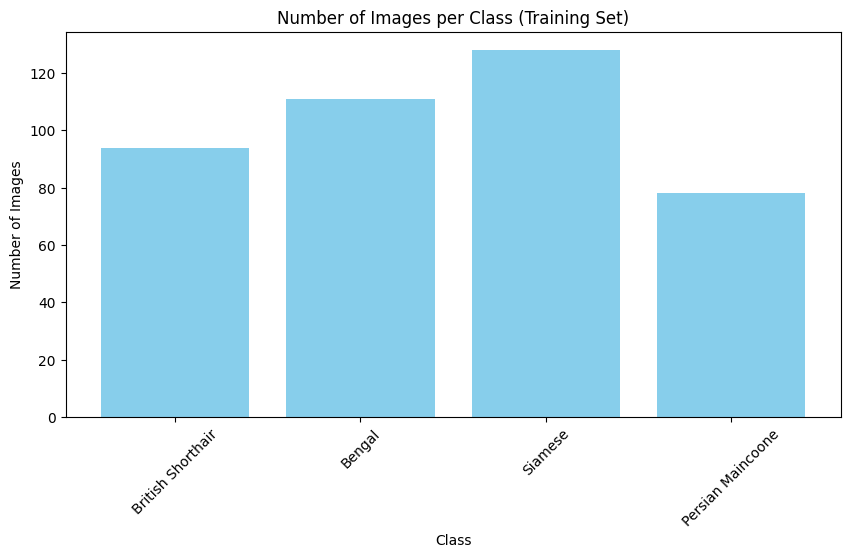

In [ ]:
train_dir = "final_dataset/train"
classes = os.listdir(train_dir)

image_counts = [len(os.listdir(os.path.join(train_dir, cls))) for cls in classes]

plt.figure(figsize=(10,5))
plt.bar(classes, image_counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Number of Images per Class (Training Set)")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


# **Dataset Visualization – Sample Images**

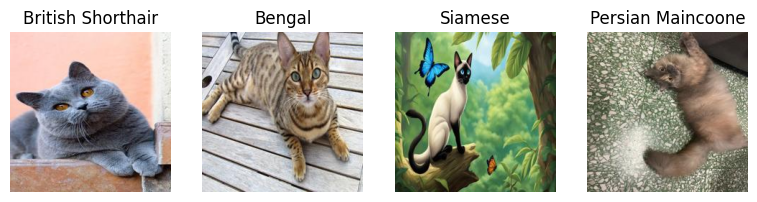

In [31]:
import random
plt.figure(figsize=(12,4))

for i, cls in enumerate(classes[:5]):  # show first 5 classes
    img_list = os.listdir(os.path.join(train_dir, cls))
    img_name = random.choice(img_list)  # ambil random image
    img_path = os.path.join(train_dir, cls, img_name)
    img = Image.open(img_path)

    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(cls)
plt.show()


# **Input Model Results**

In [33]:
# Actual results from your DS notebook
results = {
    "ResNet50": {"accuracy": 0.9494, "loss": 0.1715, "time": 278.90, "mAP": 0.93},
    "DenseNet121": {"accuracy": 0.6076, "loss": 1.0778, "time": 189.73, "mAP": 0.48},
    "MobileNetV3": {"accuracy": 0.4204, "loss": 1.3983, "time": 154.11, "mAP": 0.4645}
}


# **Accuracy Comparison**

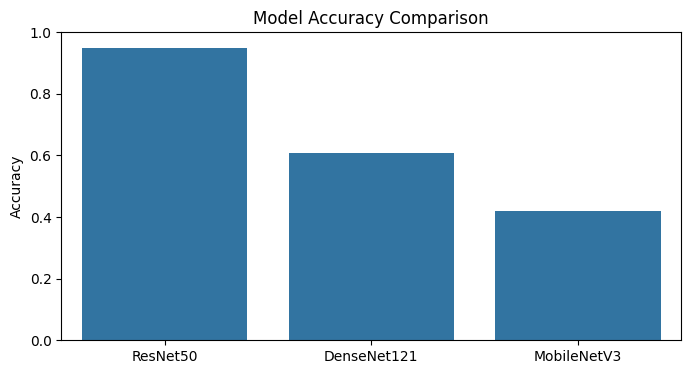

In [34]:
models = list(results.keys())
accuracy = [results[m]["accuracy"] for m in models]

plt.figure(figsize=(8,4))
sns.barplot(x=models, y=accuracy)
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


# **Loss Comparison**

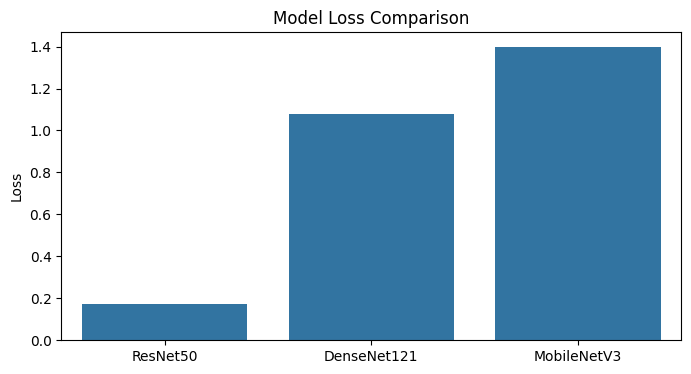

In [35]:
loss = [results[m]["loss"] for m in models]

plt.figure(figsize=(8,4))
sns.barplot(x=models, y=loss)
plt.title("Model Loss Comparison")
plt.ylabel("Loss")
plt.show()


# **Training Time Comparison**

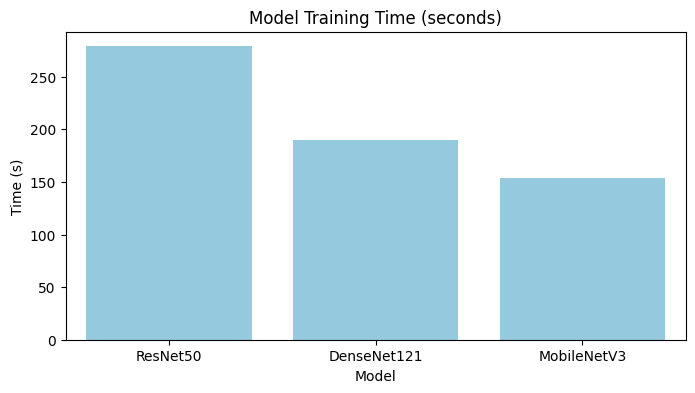

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

models_list = ["ResNet50", "DenseNet121", "MobileNetV3"]
time_ = [results[m]["time"] for m in models_list]

plt.figure(figsize=(8,4))
sns.barplot(x=models_list, y=time_, color='skyblue')  # guna color instead of palette
plt.title("Model Training Time (seconds)")
plt.ylabel("Time (s)")
plt.xlabel("Model")
plt.show()


# **Summary Table**

In [41]:
df = pd.DataFrame({
    "Model": models,
    "Test Accuracy": [results[m]["accuracy"] for m in models],
    "mAP": [results[m]["mAP"] for m in models],
    "Training Time (s)": [results[m]["time"] for m in models]
})
df["Test Accuracy (%)"] = df["Test Accuracy"]*100
df = df[["Model","Test Accuracy (%)","mAP","Training Time (s)"]]
df


,Model,Test Accuracy (%),mAP,Training Time (s)
0,ResNet50,94.94,0.9300,278.90
1,DenseNet121,60.76,0.4800,189.73
2,MobileNetV3,42.04,0.4645,154.11


**Conclusion**

ResNet50 achieved the highest accuracy (94.94%) and mAP (0.93) but required the longest training time (278.90s).
DenseNet121 is medium in accuracy and speed, while MobileNetV3 is fastest (154.11s) but lowest accuracy (42.04%).
Considering performance and efficiency, ResNet50 is the best suited model for this classification task.